In [1]:
import pandas as pd

In [2]:
soda = pd.read_csv("merged.csv")
wb = pd.read_csv("income-level.csv")

In [3]:
wb.head()

,Country,Income group,Region,Lending category,1987,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,High income,Latin America & Caribbean,NaN,NaN,10360.0,11760.0,12230.0,13190.0,13990.0,...,22450.0,23520.0,24510.0,25350.0,26560.0,26840.0,27120.0,NaN,NaN,NaN
1,Afghanistan,Low income,South Asia,IDA,NaN,NaN,NaN,NaN,NaN,NaN,...,530.0,630.0,660.0,630.0,600.0,550.0,530.0,520.0,530.0,500.0
2,Angola,Lower middle income,Sub-Saharan Africa,IBRD,670.0,650.0,860.0,780.0,1380.0,1170.0,...,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2970.0,2230.0
3,Albania,Upper middle income,Europe & Central Asia,IBRD,730.0,730.0,760.0,650.0,410.0,280.0,...,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4290.0,4860.0,5220.0,5210.0
4,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
wb = wb[['Country','Income group']]

In [5]:
# merged = pd.merge(soda, wb, how = 'left', left_on='country', right_on='Country')
# merged[merged['Country'].isna()]

In [6]:
wb['Country'] = wb['Country'].str.replace(' SAR, China', '').str.replace('West Bank and Gaza','Palestine')\
    .str.replace(', RB','').str.replace(', Islamic Rep.','')\
    .str.replace('Korea, Dem. Rep.','South Korea').str.replace(', Arab Rep.','')\
    .str.replace('Russian Federation','Russia').str.replace('Slovak Republic','Slovakia')
    

/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_77339/3669350344.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(', RB','').str.replace(', Islamic Rep.','')\
/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_77339/3669350344.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('Korea, Dem. Rep.','South Korea').str.replace(', Arab Rep.','')\


In [7]:
soda['country'] = soda['country'].str.replace('And','and',case=False)

In [8]:
merged = pd.merge(soda, wb, how = 'left', left_on='country', right_on='Country')
merged[merged['Country'].isna()]

,country,price,mo_salary,bottle_per_day,daily_salary,Country,Income group
52,Guernsey,2.18,2901.69,63.0,138.18,NaN,NaN


In [9]:
merged.sort_values(by='bottle_per_day',ascending=False).tail(20)

,country,price,mo_salary,bottle_per_day,daily_salary,Country,Income group
2,Greece,1.92,881.98,22.0,42.00,Greece,High income
37,Nigeria,0.36,158.66,21.0,7.56,Nigeria,Lower middle income
61,Bosnia and Herzegovina,1.43,620.76,21.0,29.56,Bosnia and Herzegovina,Upper middle income
10,Nepal,0.44,193.09,21.0,9.19,Nepal,Lower middle income
98,Philippines,0.74,303.29,20.0,14.44,Philippines,Lower middle income
41,Uruguay,2.11,907.89,20.0,43.23,Uruguay,High income
96,Serbia,1.40,598.79,20.0,28.51,Serbia,Upper middle income
81,Ethiopia,0.52,214.22,20.0,10.20,Ethiopia,Low income
104,Dominican Republic,0.92,369.87,19.0,17.61,Dominican Republic,Upper middle income
11,Argentina,1.07,423.66,19.0,20.17,Argentina,Upper middle income


In [10]:
%load_ext rpy2.ipython

In [11]:
%%R

library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


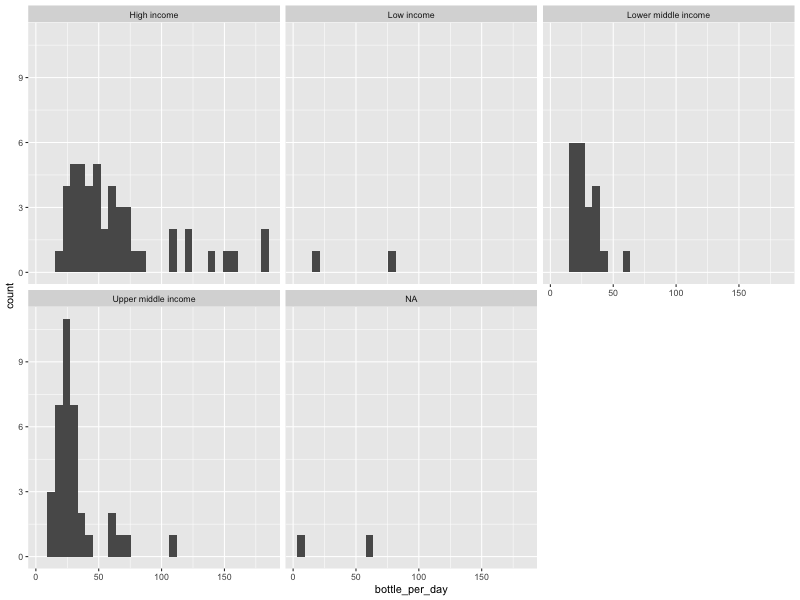

In [13]:
%%R -i merged -w 800 -h 600

ggplot(merged, aes(x=bottle_per_day)) + 
  geom_histogram() +
    facet_wrap(~`Income group`)